## Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the dataset

In [2]:
df  = pd.read_csv("advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
## Removing the unwanted column
df.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
## Collect the data
x = df["TV"].values
x.shape

(200,)

In [10]:
y = df["sales"].values
y.shape

(200,)

In [11]:
## Calculating the coefficient

##Mean of x and y
mean_x = np.mean(x)
print(mean_x)
mean_y = np.mean(y)
print(mean_y)

147.0425
14.0225


In [12]:
## Total no of values
n = len(x)
print(n)

200


In [13]:
## y=b0+b1x
## b0=y-b1x
## Calculate the b1 and b0
numer = 0
denom = 0
for i in range(n):
    numer += (x[i]-mean_x)*(y[i]-mean_y)
    denom += (x[i]-mean_x)**2
b1 = numer/denom
b0 = mean_y-(b1*mean_x)
print(b1)
print(b0)

0.04753664043301969
7.032593549127704


In [14]:
print("The linear equation is: y={:.4}x+{:.5}".format(b1,b0))

The linear equation is: y=0.04754x+7.0326


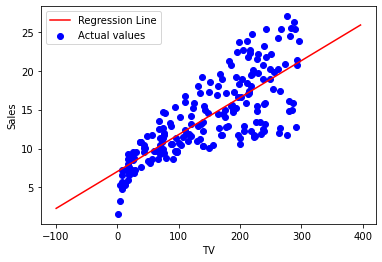

In [42]:
## Plotting the values and regression line

max_x = np.max(x)+100
min_x = np.min(x)-100
# print(max_x, min_x)

x1= np.linspace(min_x, max_x, 1000)
y1 = b0+b1*x1

plt.plot(x1,y1,color= "red",label= "Regression Line")
plt.scatter(df["TV"],df["sales"],c="Blue",label = "Actual values")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend(loc = "best")
plt.show()

In [23]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [24]:
y_pred= b0+b1*x[2]
y_pred

7.8502237645756425

In [32]:
## Determination coefficient(R2)--(0 to 1)

ss_tot= 0
ss_res= 0
for i in range(n):
    y_pred = b0+b1*x[i]
    ss_res += (y[i]-y_pred)**2
    ss_tot += (y[i]-mean_y)**2
    
r2 = 1-(ss_res/ss_tot)
print(r2)

1.0


In [33]:
## Using sklearn

from sklearn.linear_model import LinearRegression
x = df["TV"].values.reshape(-1,1)
y = df["sales"].values.reshape(-1,1)
reg = LinearRegression() ##Applying the data to the model
reg.fit(x,y)     ##fit the data

LinearRegression()

In [34]:
print(reg.coef_)

[[0.04753664]]


In [35]:
print(reg.intercept_)

[7.03259355]


In [37]:
reg.predict([[230.1]])

array([[17.97077451]])

In [39]:
pred = reg.predict(x)
pred

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431],
       [10.17476548],
       [17.23871025],
       [ 8.16396559],
       [11.66741599],
       [16.73482186],
       [16.32125309],
       [10.25557777],
       [20.40940417],
       [10.32212907],
       [14.03474068],
       [17.41459582],
       [18.31779199],
       [ 7.6600772 ],
       [17.88520856],
       [ 9.99412625],
       [19.52997632],
       [13.82557947],
       [18.44614092],
       [18.85970969],
       [10.38868036],
       [20.95607553],
       [12.39948025],
       [11.653155  ],
       [19.65832525],
       [11.58185004],
       [20.85149492],
       [19.72012288],
       [10.58358059],
       [ 9.08142275],
       [17.87094757],
       [16.65876324],
       [15.44657891],
       [20.98935118],
       [16.86792445],
       [ 8.22576322],
       [15

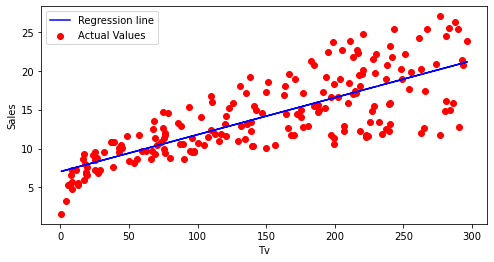

In [40]:
plt.figure(figsize = (8,4))
plt.scatter(df["TV"],df["sales"],color="red",label = "Actual Values")
plt.plot(df["TV"],pred,c = "Blue",label="Regression line")
plt.xlabel("Tv")
plt.ylabel("Sales")
plt.legend(loc ="best")
plt.show()

In [43]:
### R2 score

r2 = reg.score(x,y)
print("R2 score:",r2)

R2 score: 0.611875050850071


In [44]:
## Take the Headbrain.csv
## Apply the Linear regression
# r2,r1

In [45]:
df1 = pd.read_csv("headbrain.csv")
df1.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [49]:
from sklearn.linear_model import LinearRegression

x = df1["Head Size(cm^3)"].values.reshape(-1,1)
y = df1["Brain Weight(grams)"].values.reshape(-1,1)
reg = LinearRegression() ##Applying the data to the model
reg.fit(x,y)     ##fit the data

LinearRegression()

In [50]:
print(reg.coef_)

[[0.26342934]]


In [51]:
print(reg.intercept_)

[325.57342105]


In [54]:
reg.predict([[4512]])

array([[1514.16660083]])

In [55]:
reg.score(x,y)##to know accuracy

0.639311719957

In [56]:
reg.intercept_

array([325.57342105])

In [57]:
reg.coef_

array([[0.26342934]])

In [52]:
pred = reg.predict(x)
pred

array([[1514.16660083],
       [1310.27229206],
       [1448.04583661],
       [1320.5460363 ],
       [1425.9177721 ],
       [1269.96760312],
       [1322.65347102],
       [1263.11844029],
       [1277.34362462],
       [1374.5490509 ],
       [1232.56063691],
       [1377.44677363],
       [1284.45621679],
       [1434.08408162],
       [1335.03464997],
       [1346.62554091],
       [1246.78582124],
       [1238.61951172],
       [1140.88722677],
       [1490.98481895],
       [1347.15239959],
       [1391.40852862],
       [1327.65862847],
       [1302.89627056],
       [1576.07249561],
       [1490.72138961],
       [1388.77423523],
       [1385.08622448],
       [1235.45835965],
       [1425.39091342],
       [1323.1803297 ],
       [1325.55119375],
       [1406.42400097],
       [1421.70290266],
       [1420.91261465],
       [1330.29292186],
       [1254.68870143],
       [1312.90658546],
       [1203.84683891],
       [1245.46867455],
       [1369.28046411],
       [1248.893

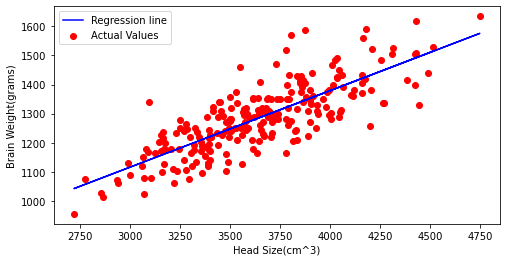

In [53]:
plt.figure(figsize = (8,4))
plt.scatter(df1["Head Size(cm^3)"],df1["Brain Weight(grams)"],color="red",label = "Actual Values")
plt.plot(df1["Head Size(cm^3)"],pred,c = "Blue",label="Regression line")
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")
plt.legend(loc ="best")
plt.show()